## DATA SETUP

In [1]:
from setup import data_setup, plot_setup
import yt
import numpy as np
import matplotlib.pyplot as plt

from gallifrey.particles import rotated_dataset

In [2]:
snapshot = 127
resolution = 4096
sim_id = "09_18"

In [3]:
ds, mw, stellar_model, imf, planet_model = data_setup(snapshot, resolution, sim_id)


      DETECTED LOCAL MACHINE: Test snapshot loaded.

yt : [INFO     ] 2023-06-07 16:36:11,932 Calculating time from 1.000e+00 to be 4.318e+17 seconds
yt : [INFO     ] 2023-06-07 16:36:11,989 Parameters: current_time              = 4.318436660023809e+17 s
yt : [INFO     ] 2023-06-07 16:36:11,990 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-06-07 16:36:11,991 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-06-07 16:36:11,992 Parameters: domain_right_edge         = [100. 100. 100.]
yt : [INFO     ] 2023-06-07 16:36:11,993 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-06-07 16:36:11,993 Parameters: current_redshift          = 4.440892098500626e-16
yt : [INFO     ] 2023-06-07 16:36:11,993 Parameters: omega_lambda              = 0.682
yt : [INFO     ] 2023-06-07 16:36:11,994 Parameters: omega_matter              = 0.318
yt : [INFO     ] 2023-06-07 16:36:11,994 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 202

## PLOT SETUP

In [4]:
gas_proj_dict, particle_proj_dict = plot_setup(ds, mw)

## FIELDS

In [5]:
def _mass_weighted_planets(field, data):
    return data["stars","planets"]/data["stars","Masses"]
ds.add_field(("stars", "mass_weighted_planets"), function=_mass_weighted_planets, sampling_type="local", units="1/Msun")

def _star_weighted_planets(field, data):
    return data["stars","planets"]/data["stars","main_sequence_stars"]
ds.add_field(("stars", "star_weighted_planets"), function=_star_weighted_planets, sampling_type="local", units="")

## CREATE DATA SOURCE

In [28]:
data_source = mw.sphere(radius=(50,"kpc"))
angular_momentum_vector = data_source.quantities.angular_momentum_vector()

In [7]:
rotated_data = rotated_dataset(data_source, mw.centre(), angular_momentum_vector, 
                                                    [('stars','planets'), ('stars','mass_weighted_planets'), ("stars","star_weighted_planets")])

yt : [INFO     ] 2023-06-07 16:36:24,008 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-06-07 16:36:24,009 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-06-07 16:36:24,010 Parameters: domain_left_edge          = [-49.64769065 -49.64769065 -49.64769065]
yt : [INFO     ] 2023-06-07 16:36:24,011 Parameters: domain_right_edge         = [49.57165222 49.57165222 49.57165222]
yt : [INFO     ] 2023-06-07 16:36:24,011 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2023-06-07 16:36:24,013 Allocating for 3.430e+05 particles


## HEAD-ON

yt : [INFO     ] 2023-06-07 16:36:24,209 xlim = -27.538019 27.461981
yt : [INFO     ] 2023-06-07 16:36:24,210 ylim = -27.538019 27.461981
yt : [INFO     ] 2023-06-07 16:36:24,211 xlim = -27.538019 27.461981
yt : [INFO     ] 2023-06-07 16:36:24,211 ylim = -27.538019 27.461981
yt : [INFO     ] 2023-06-07 16:36:24,213 Splatting (('stars', 'planets')) onto a 800 by 800 mesh using method 'cic'



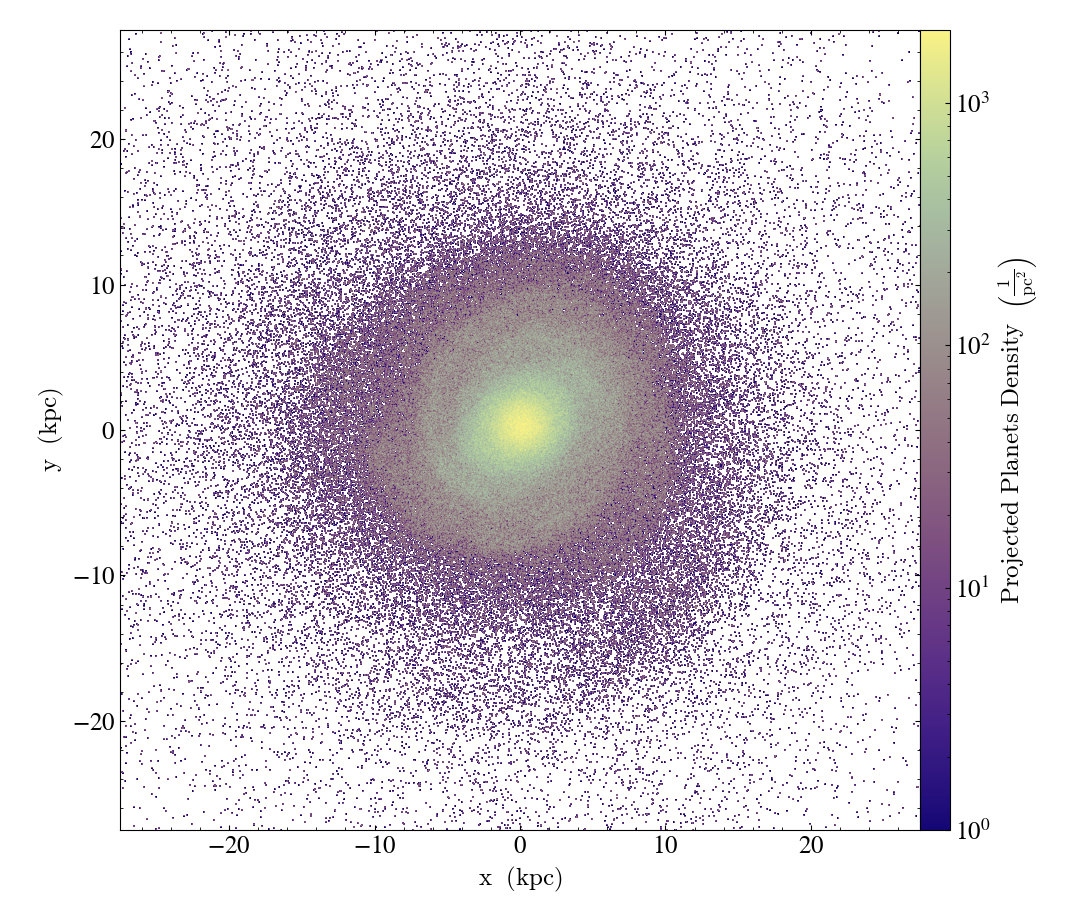

In [8]:
plot = yt.ParticleProjectionPlot(
    ds= rotated_data,
    fields=[("stars", "planets")],
    axis='z',
    width=(55,"kpc"), 
    deposition="cic",
    density=True,
)

plot.set_unit(("stars","planets"), "1/pc**2")
plot.set_zlim(("stars", "planets"), zmin=(1, "1/pc**2"), zmax=(2e3, "1/pc**2"))
plot.set_cmap(("stars", "planets"), "kelp")
plot.show()

yt : [INFO     ] 2023-06-07 16:36:25,280 xlim = -27.538019 27.461981
yt : [INFO     ] 2023-06-07 16:36:25,281 ylim = -27.538019 27.461981
yt : [INFO     ] 2023-06-07 16:36:25,282 xlim = -27.538019 27.461981
yt : [INFO     ] 2023-06-07 16:36:25,282 ylim = -27.538019 27.461981
yt : [INFO     ] 2023-06-07 16:36:25,284 Splatting (('stars', 'mass_weighted_planets')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-06-07 16:36:25,589 Splatting (('stars', 'star_weighted_planets')) onto a 800 by 800 mesh using method 'cic'



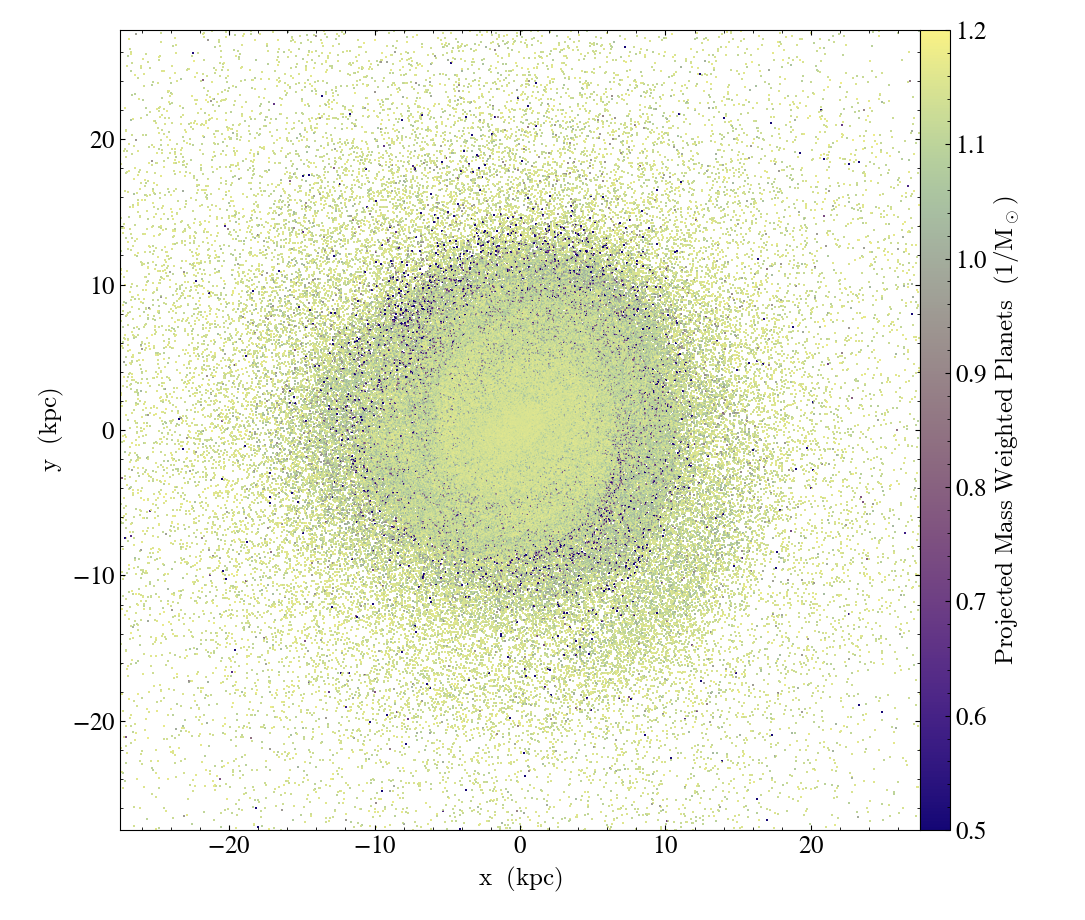
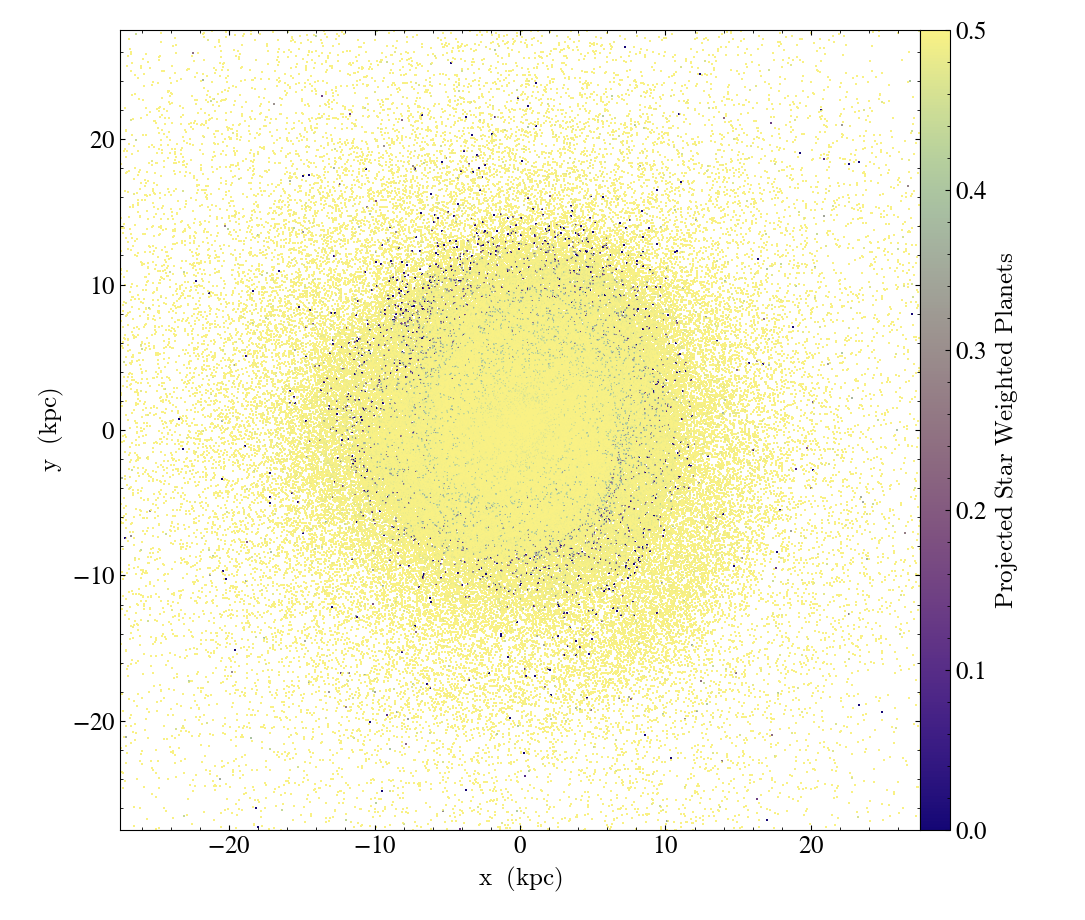

In [9]:
plot = yt.ParticleProjectionPlot(
    ds= rotated_data,
    fields=[("stars", "mass_weighted_planets"), ("stars", "star_weighted_planets")],
    axis='z',
    width=(55,"kpc"), 
    weight_field=("stars","particle_ones"),
    deposition="cic",
)

plot.set_log(("stars", "star_weighted_planets"), False)
plot.set_log(("stars", "mass_weighted_planets"), False)

plot.set_zlim(("stars", "star_weighted_planets"), zmin=(0.0, ""), zmax=(0.5, ""))
plot.set_zlim(("stars", "mass_weighted_planets"), zmin=(0.5, "1/Msun"), zmax=(1.2, "1/Msun"))

plot.set_cmap(("stars", "star_weighted_planets"), "kelp")
plot.set_cmap(("stars", "mass_weighted_planets"), "kelp")
plot.show()

## SIDE-ON

yt : [INFO     ] 2023-06-07 16:36:26,359 xlim = -27.538019 27.461981
yt : [INFO     ] 2023-06-07 16:36:26,360 ylim = -27.538019 27.461981
yt : [INFO     ] 2023-06-07 16:36:26,360 xlim = -27.538019 27.461981
yt : [INFO     ] 2023-06-07 16:36:26,361 ylim = -27.538019 27.461981
yt : [INFO     ] 2023-06-07 16:36:26,362 Splatting (('stars', 'planets')) onto a 800 by 800 mesh using method 'cic'



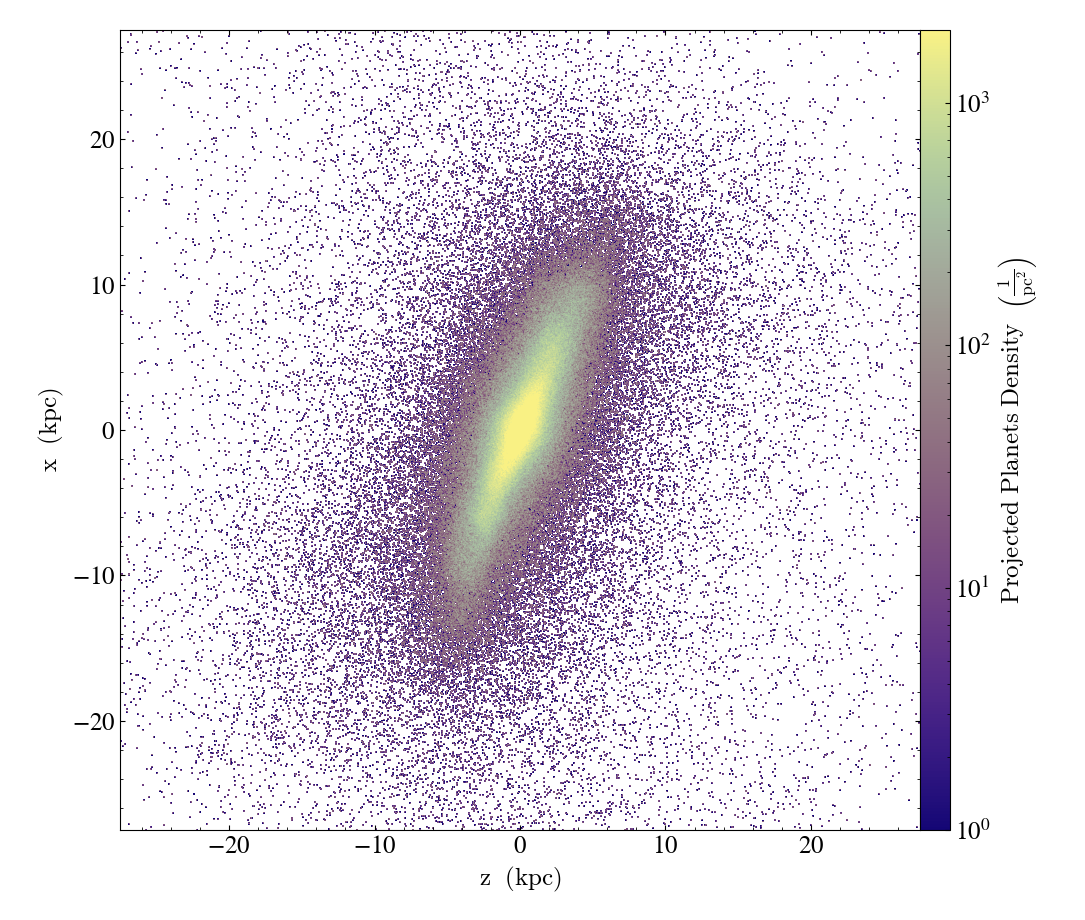

In [10]:
plot = yt.ParticleProjectionPlot(
    ds= rotated_data,
    fields=[("stars", "planets")],
    axis='y',
    width=(55,"kpc"), 
    deposition="cic",
    density = True
)

plot.set_unit(("stars","planets"), "1/pc**2")
plot.set_zlim(("stars", "planets"), zmin=(1, "1/pc**2"), zmax=(2e3, "1/pc**2"))
plot.set_cmap(("stars", "planets"), "kelp")

plot.show()

yt : [INFO     ] 2023-06-07 16:36:27,011 xlim = -27.538019 27.461981
yt : [INFO     ] 2023-06-07 16:36:27,011 ylim = -27.538019 27.461981
yt : [INFO     ] 2023-06-07 16:36:27,012 xlim = -27.538019 27.461981
yt : [INFO     ] 2023-06-07 16:36:27,012 ylim = -27.538019 27.461981
yt : [INFO     ] 2023-06-07 16:36:27,013 Splatting (('stars', 'mass_weighted_planets')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-06-07 16:36:27,208 Splatting (('stars', 'star_weighted_planets')) onto a 800 by 800 mesh using method 'cic'



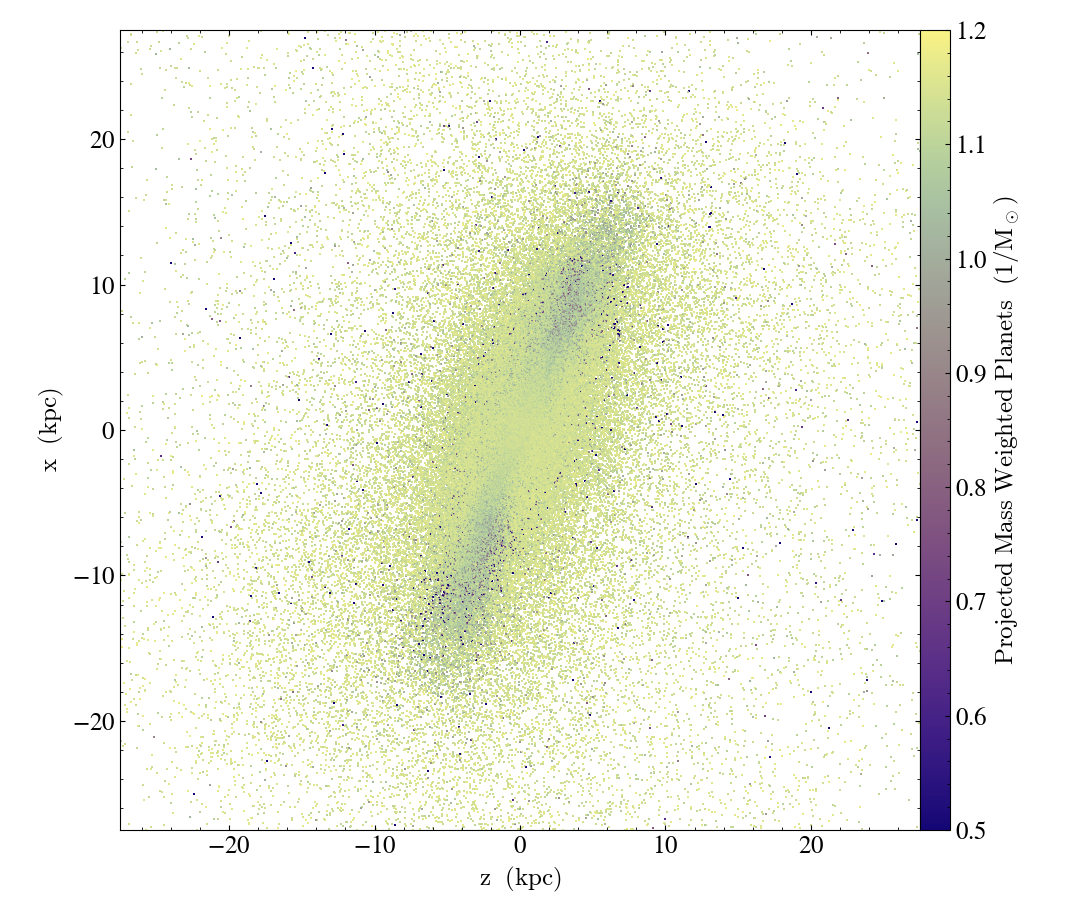
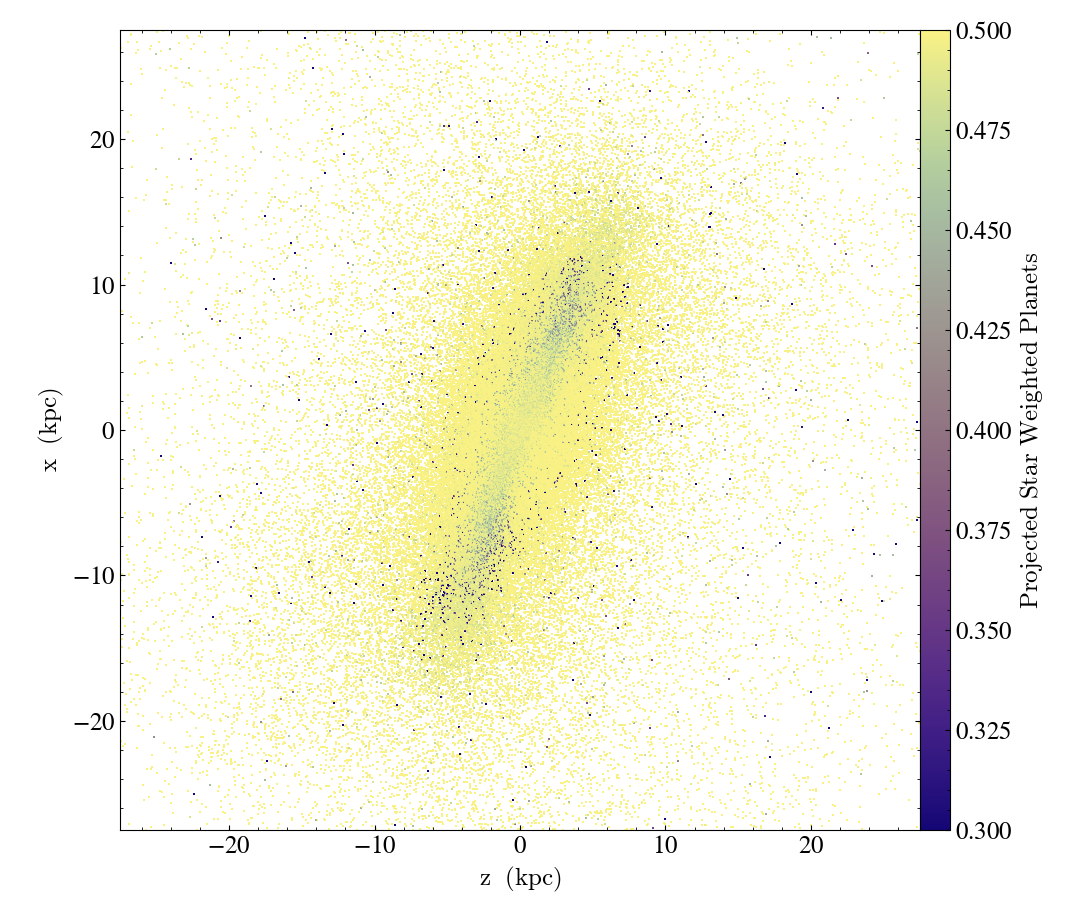

In [11]:
plot = yt.ParticleProjectionPlot(
    ds= rotated_data,
    fields=[("stars", "mass_weighted_planets"), ("stars", "star_weighted_planets")],
    axis='y',
    width=(55,"kpc"),
    weight_field=("stars","particle_ones"),
    deposition="cic"
)

plot.set_log(("stars", "star_weighted_planets"), False)
plot.set_log(("stars", "mass_weighted_planets"), False)

plot.set_zlim(("stars", "star_weighted_planets"), zmin=(0.3, ""), zmax=(0.5, ""))
plot.set_zlim(("stars", "mass_weighted_planets"), zmin=(0.5, "1/Msun"), zmax=(1.2, "1/Msun"))

plot.set_cmap(("stars", "star_weighted_planets"), "kelp")
plot.set_cmap(("stars", "mass_weighted_planets"), "kelp")

plot.show()

## 1D Profiles

In [12]:
# planet profiles
total_planet_profile = yt.create_profile(
        data_source=mw.sphere(radius=ds.quan(25,'kpc')),
        bin_fields=[("stars", "particle_radius")],
        fields=("stars", "planets"),
        n_bins=100,
        units={('stars', 'particle_radius'): 'kpc'},
        logs={('stars', 'particle_radius'): False},
        weight_field=None,
        deposition = "cic"
)

relative_planet_profiles = yt.create_profile(
        data_source=mw.sphere(radius=ds.quan(25,'kpc')),
        bin_fields=[("stars", "particle_radius")],
        fields=[("stars", "star_weighted_planets"), ("stars", "mass_weighted_planets")],
        n_bins=100,
        units={('stars', 'particle_radius'): 'kpc'},
        logs={('stars', 'particle_radius'): False},
        weight_field=("stars", "particle_ones"),
        deposition = "cic"
)

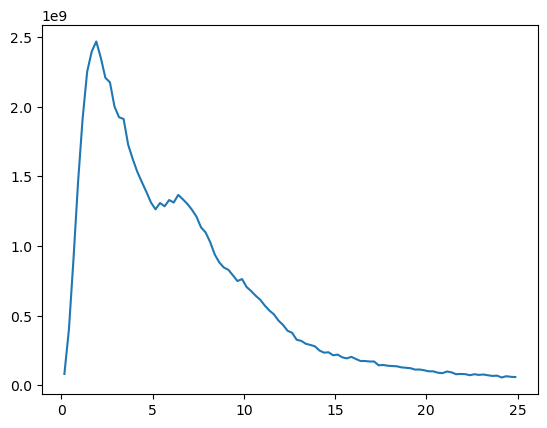

In [13]:
plt.plot(total_planet_profile.x, total_planet_profile['stars','planets'])

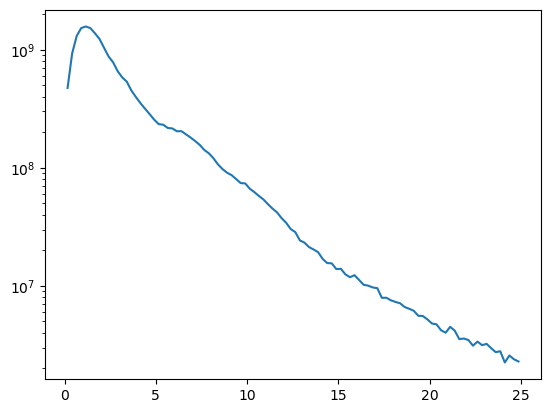

In [14]:
bin_width = total_planet_profile.x_bins[1]-total_planet_profile.x_bins[0]
plt.plot(total_planet_profile.x, total_planet_profile['stars','planets']/(total_planet_profile.x*4/3*np.pi*bin_width))
plt.yscale('log')

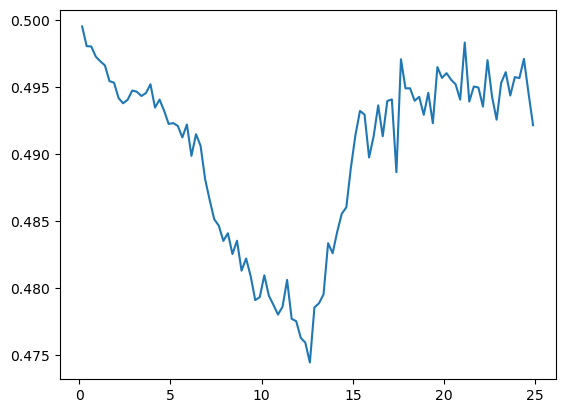

In [15]:
plt.plot(relative_planet_profiles.x, relative_planet_profiles['stars','star_weighted_planets'])

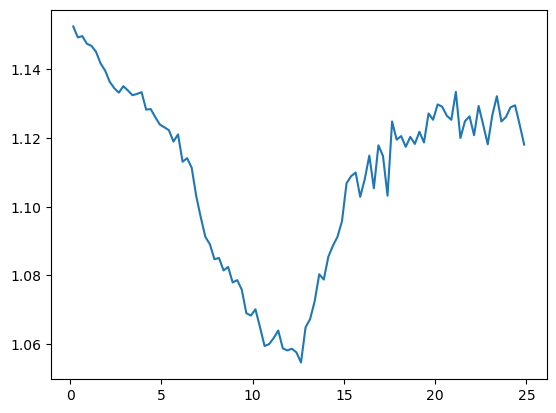

In [16]:
plt.plot(relative_planet_profiles.x, relative_planet_profiles['stars','mass_weighted_planets'])

In [17]:
from astropy.modeling.models import Sersic1D

In [18]:
plot = yt.PhasePlot(data_source, ("stars", "particle_radius"), ("stars", "planets"), ("stars", "Masses"), weight_field=None)


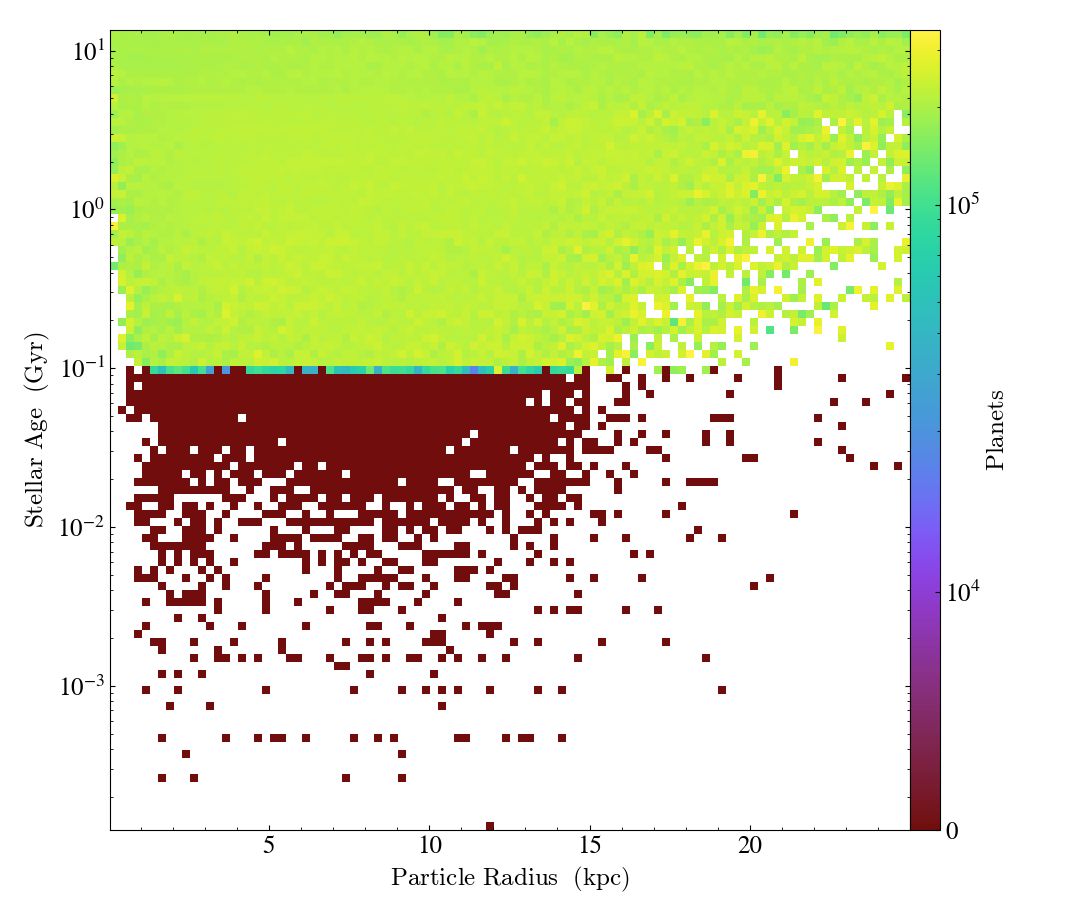

In [54]:
profile = yt.create_profile(
    mw.sphere(radius=ds.quan(25,'kpc')), # should be data_source
    [("stars", "particle_radius"), ("stars", "stellar_age")],
    n_bins=[100, 100],
    fields=[("stars", "planets")],
    units={('stars', 'particle_radius'): 'kpc'},
    logs={('stars', 'particle_radius'): False},
    weight_field=("stars", "particle_ones"),
    deposition = "cic",
)
plot = yt.PhasePlot.from_profile(profile)
plot.show()


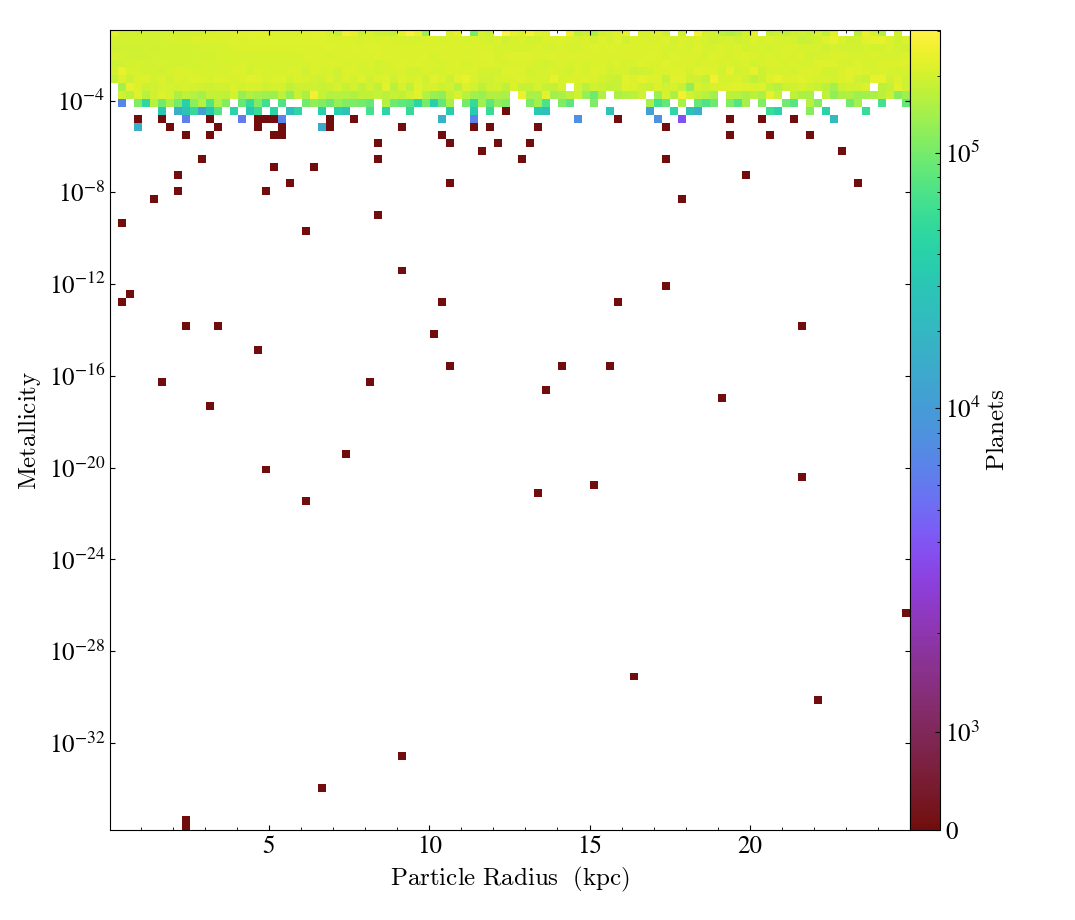

In [55]:
profile = yt.create_profile(
    mw.sphere(radius=ds.quan(25,'kpc')), # should be data_source
    [("stars", "particle_radius"), ("stars", "metallicity")],
    n_bins=[100, 100],
    fields=[("stars", "planets")],
    units={('stars', 'particle_radius'): 'kpc'},
    logs={('stars', 'particle_radius'): False},
    weight_field=("stars", "particle_ones"),
    deposition = "cic"
)
plot = yt.PhasePlot.from_profile(profile)
plot.show()